# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

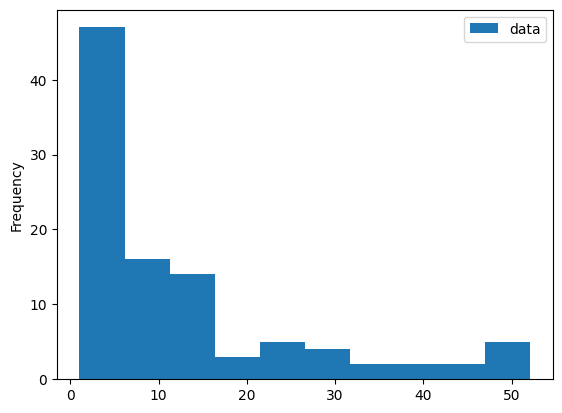

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

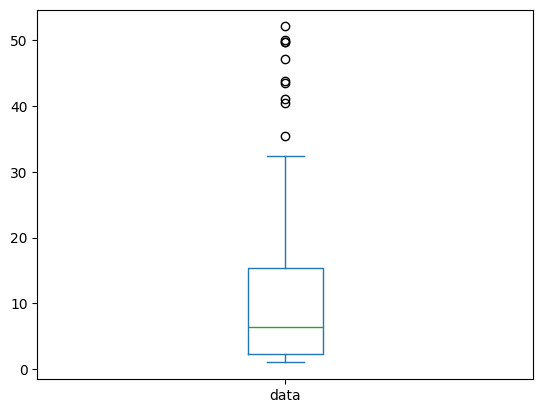

In [3]:
df.plot.box()

#### Histogram

Pros:
- Easy to read how the prices are distributed and what the majority of prices are

Cons:
- Low amount of bars clumps a lot of prices together. You don't get the full granularity of all the prices
- Histograms need to get the right amount of bins for best readability while box plots don't

Improvements:
- mess around with the bar count to see if it improves readability for seeing a more granular view of the distribution shape
- Add a price label on the x-axis with units
- Add a title to let the reader know that this is measuring the frequency of drug prices
- The legend isn't really providing any detail that the reader uses. Either label it drug price data or something similar, or you could remove it entirely if you have the x-axis and the title added for better readability and interpretability.


#### Box Plot

Pros:
- It clearly summarizes the distribution of the prices
- You get access to the Q1, median, Q3, and the smallest and largest values within 1.5 × IQR of Q1 and Q3, and any outliers plotted above or below the 1.5 x IQR

Cons:
- Though you get a rough idea of the distribution, you don't get an actual distribution shape that histograms can show (like if there are certain prices that are more dense than others as shown in the histograms with the frequency counts)

Improvements:
- Label the y-axis to drug prices with the units so we know what is being measured
- Add a title to let the reader know that it is measuring the distribution of drug prices that the pharmacy sells
- x-axis label "data" is vague. You could label it something like pharmacy drugs. 


#### Overall Preference
For the pharmacy administrator, who wants to see how much the more expensive drugs tend to cost in the context of the other prices, it makes more sense to show more specific statistics about the data. In that case, the box plot is a better option because it clearly shows the Q1, median, Q3, and the smallest and largest values within 1.5 × IQR of Q1 and Q3, and any outliers beyond that range. Since the administrator wants to compare the more expensive drugs with the rest of the prices, the box plot makes it easier to see how much the outliers deviate from the majority of the data and the whiskers.

---

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

#### NCHS - Death rates and life expectancy at birth

In [4]:
life_expectancy = pd.read_csv('../Projects/Health Disparities Analytics/Data/Life Expectancy at Birth/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv')
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1071 non-null   int64  
 1   Race                             1071 non-null   object 
 2   Sex                              1071 non-null   object 
 3   Average Life Expectancy (Years)  1065 non-null   float64
 4   Age-adjusted Death Rate          1071 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 42.0+ KB


All columns are self-explanatory besides `Age-adjusted Death Rate`. Looking at the [data source](https://catalog.data.gov/dataset/nchs-death-rates-and-life-expectancy-at-birth), it mentions that `Age-adjusted Death Rate` are deaths per 100,000.

In [5]:
life_expectancy.describe()

,Year,Average Life Expectancy (Years),Age-adjusted Death Rate
count,1071.000000,1065.000000,1071.000000
mean,1959.000000,64.500188,1593.061625
std,34.367176,11.843765,682.369379
min,1900.000000,29.100000,611.300000
25%,1929.000000,57.100000,1012.950000
50%,1959.000000,66.800000,1513.700000
75%,1989.000000,73.900000,2057.150000
max,2018.000000,81.400000,3845.700000


In [6]:
life_expectancy['Sex'].unique()

array(['Both Sexes', 'Female', 'Male'], dtype=object)

In [7]:
life_expectancy['Race'].unique()

array(['All Races', 'Black', 'White'], dtype=object)

Unfortunately this dataset is very limited when it comes to `Race`. I will have to find a new dataset that has the life expectancy data for each race rather than just All Races, Black, and White.

#### Demographics Data

In [8]:
demographics = pd.read_csv('../Projects/Health Disparities Analytics/Data/Demographics/census_pop_county.csv')
demographics.head()

,GISJOIN,STATE,STATEFP,STATENH,COUNTY,COUNTYFP,COUNTYNH,A00AA1970,A00AA1980,A00AA1990,...,B57AQ1990,B57AQ2000,B57AQ2010,B57AQ2020,B57AR1970,B57AR1980,B57AR1990,B57AR2000,B57AR2010,B57AR2020
0,G0100010,Alabama,1,10,Autauga County,1,10,24460.0,32259.0,34222.0,...,1107.0,1342.0,1982.0,2896.0,136.0,181.0,299.0,428.0,551.0,927.0
1,G0100030,Alabama,1,10,Baldwin County,3,30,59382.0,78556.0,98280.0,...,4698.0,7184.0,9532.0,15467.0,469.0,676.0,1160.0,2164.0,3233.0,4606.0
2,G0100050,Alabama,1,10,Barbour County,5,50,22543.0,24756.0,25417.0,...,1303.0,1323.0,1228.0,1472.0,213.0,252.0,334.0,512.0,443.0,492.0
3,G0100070,Alabama,1,10,Bibb County,7,70,13812.0,15723.0,16576.0,...,773.0,755.0,904.0,1111.0,122.0,149.0,220.0,334.0,279.0,353.0
4,G0100090,Alabama,1,10,Blount County,9,90,26853.0,36459.0,39248.0,...,1796.0,2077.0,2552.0,3441.0,174.0,288.0,408.0,716.0,808.0,1053.0


This combined dataset is quite large with 130 columns and cryptic named columns. I will have to rename the columns for readability based on the source's codebook.

In [9]:
# Rename columns for readability
demographics = demographics.rename(columns={

    # Total Population
    'A00AA1970': 'total_pop_1970',
    'A00AA1980': 'total_pop_1980',
    'A00AA1990': 'total_pop_1990',
    'A00AA2000': 'total_pop_2000',
    'A00AA2010': 'total_pop_2010',
    'A00AA2020': 'total_pop_2020',

    # Persons by Sex
    'A08AA1970': 'male_pop_1970',
    'A08AA1980': 'male_pop_1980',
    'A08AA1990': 'male_pop_1990',
    'A08AA2000': 'male_pop_2000',
    'A08AA2010': 'male_pop_2010',
    'A08AA2020': 'male_pop_2020',

    'A08AB1970': 'female_pop_1970',
    'A08AB1980': 'female_pop_1980',
    'A08AB1990': 'female_pop_1990',
    'A08AB2000': 'female_pop_2000',
    'A08AB2010': 'female_pop_2010',
    'A08AB2020': 'female_pop_2020',

    # Persons Under 5 Years
    'B57AA1970': 'pop_under_5_years_1970',
    'B57AA1980': 'pop_under_5_years_1980',
    'B57AA1990': 'pop_under_5_years_1990',
    'B57AA2000': 'pop_under_5_years_2000',
    'B57AA2010': 'pop_under_5_years_2010',
    'B57AA2020': 'pop_under_5_years_2020',

    # Persons 5 to 9 Years
    'B57AB1970': 'pop_5_9_years_1970',
    'B57AB1980': 'pop_5_9_years_1980',
    'B57AB1990': 'pop_5_9_years_1990',
    'B57AB2000': 'pop_5_9_years_2000',
    'B57AB2010': 'pop_5_9_years_2010',
    'B57AB2020': 'pop_5_9_years_2020',

    # Persons 10 to 14 Years
    'B57AC1970': 'pop_10_14_years_1970',
    'B57AC1980': 'pop_10_14_years_1980',
    'B57AC1990': 'pop_10_14_years_1990',
    'B57AC2000': 'pop_10_14_years_2000',
    'B57AC2010': 'pop_10_14_years_2010',
    'B57AC2020': 'pop_10_14_years_2020',

    # Persons 15 to 17 Years
    'B57AD1970': 'pop_15_17_years_1970',
    'B57AD1980': 'pop_15_17_years_1980',
    'B57AD1990': 'pop_15_17_years_1990',
    'B57AD2000': 'pop_15_17_years_2000',
    'B57AD2010': 'pop_15_17_years_2010',
    'B57AD2020': 'pop_15_17_years_2020',

    # Persons 18 to 19 Years
    'B57AE1970': 'pop_18_19_years_1970',
    'B57AE1980': 'pop_18_19_years_1980',
    'B57AE1990': 'pop_18_19_years_1990',
    'B57AE2000': 'pop_18_19_years_2000',
    'B57AE2010': 'pop_18_19_years_2010',
    'B57AE2020': 'pop_18_19_years_2020',

    # Persons 20 Years
    'B57AF1970': 'pop_20_years_1970',
    'B57AF1980': 'pop_20_years_1980',
    'B57AF1990': 'pop_20_years_1990',
    'B57AF2000': 'pop_20_years_2000',
    'B57AF2010': 'pop_20_years_2010',
    'B57AF2020': 'pop_20_years_2020',

    # Persons 21 Years
    'B57AG1970': 'pop_21_years_1970',
    'B57AG1980': 'pop_21_years_1980',
    'B57AG1990': 'pop_21_years_1990',
    'B57AG2000': 'pop_21_years_2000',
    'B57AG2010': 'pop_21_years_2010',
    'B57AG2020': 'pop_21_years_2020',

    # Persons 22 to 24 Years
    'B57AH1970': 'pop_22_24_years_1970',
    'B57AH1980': 'pop_22_24_years_1980',
    'B57AH1990': 'pop_22_24_years_1990',
    'B57AH2000': 'pop_22_24_years_2000',
    'B57AH2010': 'pop_22_24_years_2010',
    'B57AH2020': 'pop_22_24_years_2020',

    # Persons 25 to 29 Years
    'B57AI1970': 'pop_25_29_years_1970',
    'B57AI1980': 'pop_25_29_years_1980',
    'B57AI1990': 'pop_25_29_years_1990',
    'B57AI2000': 'pop_25_29_years_2000',
    'B57AI2010': 'pop_25_29_years_2010',
    'B57AI2020': 'pop_25_29_years_2020',

    # Persons 30 to 34 Years
    'B57AJ1970': 'pop_30_34_years_1970',
    'B57AJ1980': 'pop_30_34_years_1980',
    'B57AJ1990': 'pop_30_34_years_1990',
    'B57AJ2000': 'pop_30_34_years_2000',
    'B57AJ2010': 'pop_30_34_years_2010',
    'B57AJ2020': 'pop_30_34_years_2020',

    # Persons 35 to 44 Years
    'B57AK1970': 'pop_35_44_years_1970',
    'B57AK1980': 'pop_35_44_years_1980',
    'B57AK1990': 'pop_35_44_years_1990',
    'B57AK2000': 'pop_35_44_years_2000',
    'B57AK2010': 'pop_35_44_years_2010',
    'B57AK2020': 'pop_35_44_years_2020',

    # Persons 45 to 54 Years
    'B57AL1970': 'pop_45_54_years_1970',
    'B57AL1980': 'pop_45_54_years_1980',
    'B57AL1990': 'pop_45_54_years_1990',
    'B57AL2000': 'pop_45_54_years_2000',
    'B57AL2010': 'pop_45_54_years_2010',
    'B57AL2020': 'pop_45_54_years_2020',

    # Persons 55 to 59 Years
    'B57AM1970': 'pop_55_59_years_1970',
    'B57AM1980': 'pop_55_59_years_1980',
    'B57AM1990': 'pop_55_59_years_1990',
    'B57AM2000': 'pop_55_59_years_2000',
    'B57AM2010': 'pop_55_59_years_2010',
    'B57AM2020': 'pop_55_59_years_2020',

    # Persons 60 to 61 Years
    'B57AN1970': 'pop_60_61_years_1970',
    'B57AN1980': 'pop_60_61_years_1980',
    'B57AN1990': 'pop_60_61_years_1990',
    'B57AN2000': 'pop_60_61_years_2000',
    'B57AN2010': 'pop_60_61_years_2010',
    'B57AN2020': 'pop_60_61_years_2020',

    # Persons 62 to 64 Years
    'B57AO1970': 'pop_62_64_years_1970',
    'B57AO1980': 'pop_62_64_years_1980',
    'B57AO1990': 'pop_62_64_years_1990',
    'B57AO2000': 'pop_62_64_years_2000',
    'B57AO2010': 'pop_62_64_years_2010',
    'B57AO2020': 'pop_62_64_years_2020',

    # Persons 65 to 74 Years
    'B57AP1970': 'pop_65_74_years_1970',
    'B57AP1980': 'pop_65_74_years_1980',
    'B57AP1990': 'pop_65_74_years_1990',
    'B57AP2000': 'pop_65_74_years_2000',
    'B57AP2010': 'pop_65_74_years_2010',
    'B57AP2020': 'pop_65_74_years_2020',

    # Persons 75 to 84 Years
    'B57AQ1970': 'pop_75_84_years_1970',
    'B57AQ1980': 'pop_75_84_years_1980',
    'B57AQ1990': 'pop_75_84_years_1990',
    'B57AQ2000': 'pop_75_84_years_2000',
    'B57AQ2010': 'pop_75_84_years_2010',
    'B57AQ2020': 'pop_75_84_years_2020',

    # Persons 85 years and older
    'B57AR1970': 'pop_85_years_and_older_1970',
    'B57AR1980': 'pop_85_years_and_older_1980',
    'B57AR1990': 'pop_85_years_and_older_1990',
    'B57AR2000': 'pop_85_years_and_older_2000',
    'B57AR2010': 'pop_85_years_and_older_2010',
    'B57AR2020': 'pop_85_years_and_older_2020',
})

In [10]:
demographics.head()

,GISJOIN,STATE,STATEFP,STATENH,COUNTY,COUNTYFP,COUNTYNH,total_pop_1970,total_pop_1980,total_pop_1990,...,pop_75_84_years_1990,pop_75_84_years_2000,pop_75_84_years_2010,pop_75_84_years_2020,pop_85_years_and_older_1970,pop_85_years_and_older_1980,pop_85_years_and_older_1990,pop_85_years_and_older_2000,pop_85_years_and_older_2010,pop_85_years_and_older_2020
0,G0100010,Alabama,1,10,Autauga County,1,10,24460.0,32259.0,34222.0,...,1107.0,1342.0,1982.0,2896.0,136.0,181.0,299.0,428.0,551.0,927.0
1,G0100030,Alabama,1,10,Baldwin County,3,30,59382.0,78556.0,98280.0,...,4698.0,7184.0,9532.0,15467.0,469.0,676.0,1160.0,2164.0,3233.0,4606.0
2,G0100050,Alabama,1,10,Barbour County,5,50,22543.0,24756.0,25417.0,...,1303.0,1323.0,1228.0,1472.0,213.0,252.0,334.0,512.0,443.0,492.0
3,G0100070,Alabama,1,10,Bibb County,7,70,13812.0,15723.0,16576.0,...,773.0,755.0,904.0,1111.0,122.0,149.0,220.0,334.0,279.0,353.0
4,G0100090,Alabama,1,10,Blount County,9,90,26853.0,36459.0,39248.0,...,1796.0,2077.0,2552.0,3441.0,174.0,288.0,408.0,716.0,808.0,1053.0


In [11]:
# Count missing values per column
missing_counts = demographics.isna().sum()

# Filter only columns that actually have missing values
missing_counts = missing_counts[missing_counts > 0]

print(f'------------ Total NA values: {missing_counts.sum()}------------ \n')

for col, count in missing_counts.items():
    print(f'{col}: {count}')

------------ Total NA values: 10206------------ 

total_pop_1970: 107
total_pop_1980: 111
total_pop_1990: 107
total_pop_2000: 107
total_pop_2010: 27
total_pop_2020: 27
male_pop_1970: 107
male_pop_1980: 111
male_pop_1990: 107
male_pop_2000: 107
male_pop_2010: 27
male_pop_2020: 27
female_pop_1970: 107
female_pop_1980: 111
female_pop_1990: 107
female_pop_2000: 107
female_pop_2010: 27
female_pop_2020: 27
pop_under_5_years_1970: 107
pop_under_5_years_1980: 111
pop_under_5_years_1990: 107
pop_under_5_years_2000: 107
pop_under_5_years_2010: 27
pop_under_5_years_2020: 27
pop_5_9_years_1970: 107
pop_5_9_years_1980: 111
pop_5_9_years_1990: 107
pop_5_9_years_2000: 107
pop_5_9_years_2010: 27
pop_5_9_years_2020: 27
pop_10_14_years_1970: 107
pop_10_14_years_1980: 111
pop_10_14_years_1990: 107
pop_10_14_years_2000: 107
pop_10_14_years_2010: 27
pop_10_14_years_2020: 27
pop_15_17_years_1970: 107
pop_15_17_years_1980: 111
pop_15_17_years_1990: 107
pop_15_17_years_2000: 107
pop_15_17_years_2010: 27
pop_1

There are quite a lot of missing values for this dataset. I will need to figure out when it is appropriate to have missing values and when it is not. For example, maybe there aren't any people in a specific age group. Maybe there are counties in the U.S. that do not have anyone age 85 or older.

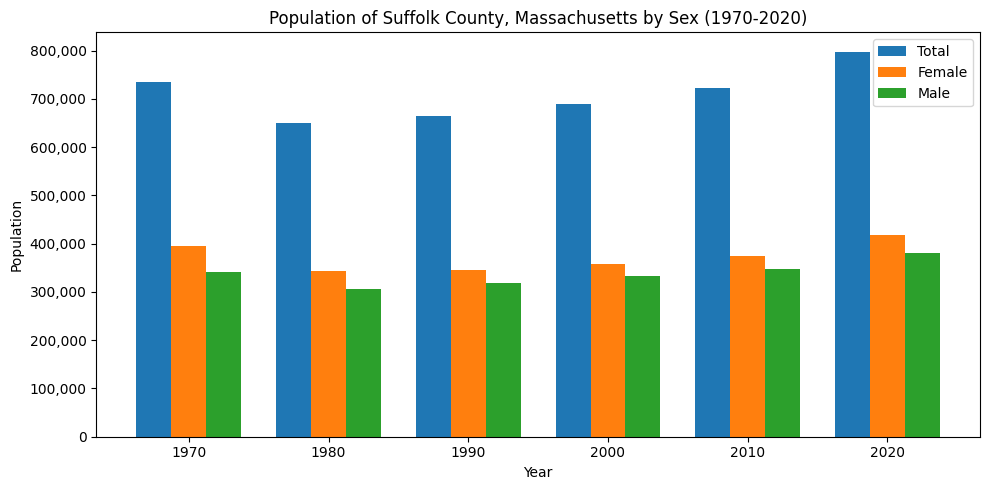

In [12]:
# For now, let's analyze Suffolk County, Massachusetts populations over time and by sex

# I need to make sure that I group by state and county because there may be multiple counties with the same name throughout the US
counties = demographics.groupby(['STATE','COUNTY']).sum(numeric_only=True)

suffolk = counties.loc[('Massachusetts', 'Suffolk County')]
years = [1970, 1980, 1990, 2000, 2010, 2020]

total_pop = [suffolk[f'total_pop_{yr}'] for yr in years]
female_pop = [suffolk[f'female_pop_{yr}'] for yr in years]
male_pop = [suffolk[f'male_pop_{yr}'] for yr in years]

x = np.arange(len(years))
width = 0.25

plt.figure(figsize=(10,5))

plt.bar(x - width, total_pop, width, label='Total')
plt.bar(x, female_pop, width, label='Female')
plt.bar(x + width, male_pop, width, label='Male')

plt.xticks(x, years)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Suffolk County, Massachusetts by Sex (1970-2020)')
plt.legend()

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()

Interestingly, the population in Suffolk County dropped significantly from 1970 to 1980. After that drop, the total population and both sexes grow in population.

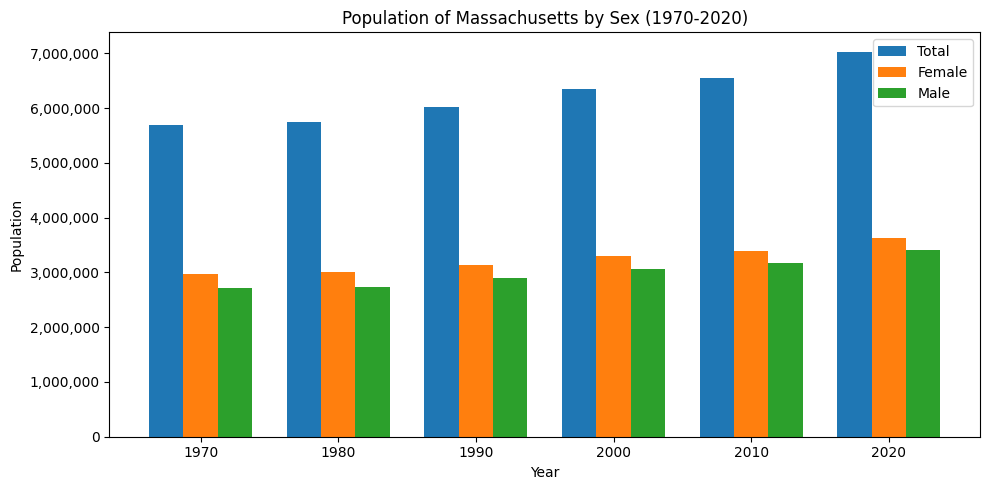

In [13]:

states = demographics.groupby('STATE').sum(numeric_only=True)

mass = states.loc['Massachusetts']
years = [1970, 1980, 1990, 2000, 2010, 2020]

total_pop = [mass[f'total_pop_{yr}'] for yr in years]
female_pop = [mass[f'female_pop_{yr}'] for yr in years]
male_pop = [mass[f'male_pop_{yr}'] for yr in years]

x = np.arange(len(years))
width = 0.25

plt.figure(figsize=(10,5))

plt.bar(x - width, total_pop, width, label='Total')
plt.bar(x, female_pop, width, label='Female')
plt.bar(x + width, male_pop, width, label='Male')

plt.xticks(x, years)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Massachusetts by Sex (1970-2020)')
plt.legend()

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()

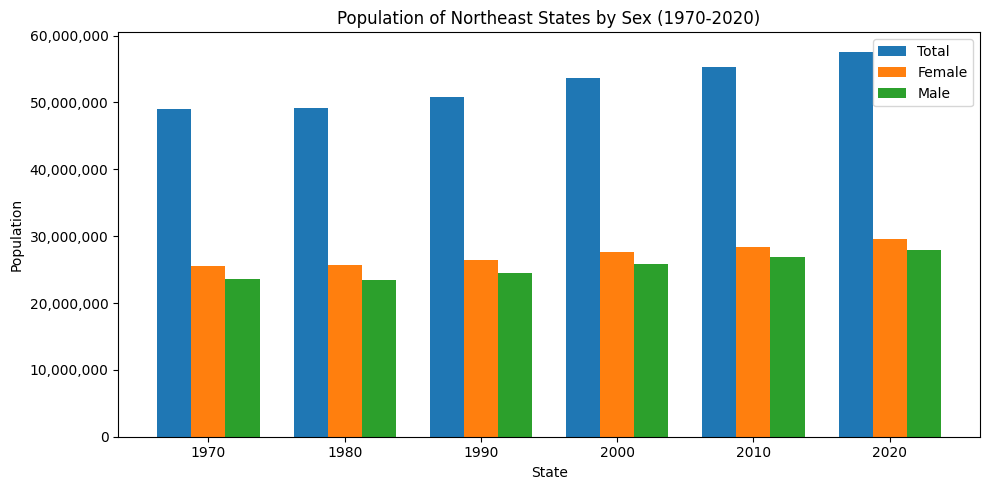

In [14]:
# Analyze the change in Population by Sex in the Northeast (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont, New Jersey, New York, Pennsylvania)

northeast_states = {
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'
}

region = demographics[demographics['STATE'].isin(northeast_states)]
region_group = region.sum(numeric_only=True)

years = [1970, 1980, 1990, 2000, 2010, 2020]

total_pop = [region_group.loc[f'total_pop_{yr}'] for yr in years]
female_pop = [region_group.loc[f'female_pop_{yr}'] for yr in years]
male_pop = [region_group.loc[f'male_pop_{yr}'] for yr in years]

x = np.arange(len(years))
width = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - width, total_pop, width, label='Total')
plt.bar(x, female_pop, width, label='Female')
plt.bar(x + width, male_pop, width, label='Male')

plt.xticks(x, years)
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Population of Northeast States by Sex (1970-2020)')
plt.legend()

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [15]:
# Since ages are grouped into ranges, I am going to find the mode age group for Suffolk County over the time series range 1970-2020

def format_age_group(col_name):
    col_name = col_name.rsplit('_', 1)[0] # removing the year ending
    col_name = col_name.replace('pop_', '') # removing pop_ beginning

    # under 5 and above 85 have different naming formats since they aren't precise ranges
    if col_name == 'under_5_years':
        return 'under 5 years'
    elif col_name == '85_years_and_older':
        return '85 years and older'
    else:
        col_name = col_name.replace('_years', ' years')
        col_name = col_name.replace('_', '-')
        return col_name

years = ['1970','1980','1990','2000','2010','2020']
mode_age_by_decade = {}

for year in years:
    age_groups = [col for col in demographics.columns if col.startswith('pop_') and col.endswith(year)]

    mode_age_group = suffolk[age_groups].idxmax()
    age_pop = suffolk[mode_age_group]

    formatted_mode_age_group = format_age_group(mode_age_group)

    mode_age_by_decade[year] = (formatted_mode_age_group, int(age_pop))

print('--------- Mode Age Group in Suffolk County, Massachusetts by Year---------')
for yr, (age_group, pop) in mode_age_by_decade.items():
    print(f'    {yr}: {age_group} ({pop:,} people in this age group.)')

--------- Mode Age Group in Suffolk County, Massachusetts by Year---------
    1970: 45-54 years (77,550 people in this age group.)
    1980: 25-29 years (70,450 people in this age group.)
    1990: 35-44 years (90,270 people in this age group.)
    2000: 35-44 years (102,750 people in this age group.)
    2010: 35-44 years (92,929 people in this age group.)
    2020: 25-29 years (104,366 people in this age group.)


In [16]:
# Setting color palette for the Age Groups for consistency

ordered_age_groups = [
    'under 5 years',
    '5-9 years',
    '10-14 years',
    '15-17 years',
    '18-19 years',
    '20 years',
    '21 years',
    '22-24 years',
    '25-29 years',
    '30-34 years',
    '35-44 years',
    '45-54 years',
    '55-59 years',
    '60-61 years',
    '62-64 years',
    '65-74 years',
    '75-84 years',
    '85 years and older'
]

cmap = plt.get_cmap("coolwarm")
colors = [cmap(i / (len(ordered_age_groups) - 1)) for i in range(len(ordered_age_groups))]
age_color_map = dict(zip(ordered_age_groups, colors))

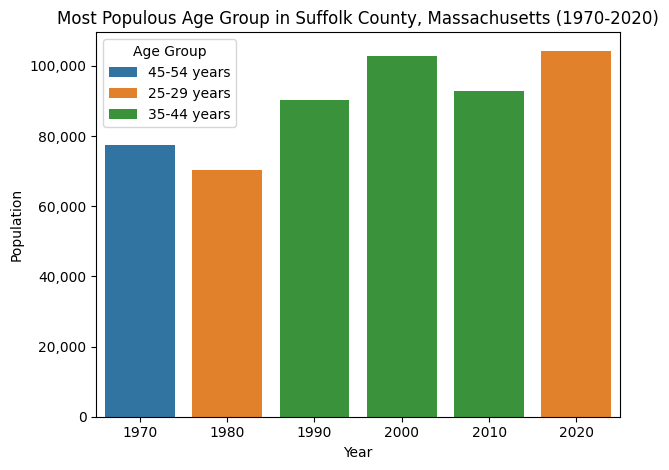

In [17]:
# Visualizing the above information

mode_df = pd.DataFrame({
    'year': list(mode_age_by_decade.keys()),
    'age_group': [v[0] for v in mode_age_by_decade.values()],
    'population': [v[1] for v in mode_age_by_decade.values()]
})

# Convert year to int for better plotting
mode_df['year'] = mode_df['year'].astype(int)

sns.barplot(mode_df, x='year', y='population', hue='age_group')
plt.title('Most Populous Age Group in Suffolk County, Massachusetts (1970-2020)')
plt.ylabel('Population')
plt.xlabel('Year')

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

I learned how to convert the type of a column using GPT-5 mini. Here is a [link](https://terriergpt.bu.edu/share/TFB0Hd-ZeIJH40hQsu2w1) to the prompt conversation.

In 1970, the most common age group in Suffolk County, MA was 45-54 years old. However, a decade later there was a significant shift in a younger age group being the most populous (25-29). In 1990, the most populous age group changed to 35-44. I wonder if the majority of the people aged into the new age group category and then a smaller portion moved to the county, since the population increased significantly as well. It is interesting to see that the age group did not change for 3 decades (1990-2010) until 2020 where the most populous age group got younger. It would be interesting to see what other factors might affect these demographic changes (income, housing, hiring market, having children or not, etc.)

Due to how the data is structured, you cannot find the true median, mode, or mean ages. I stuck with using the mode age group, which still provides valuable information into how the demographics are structured on a county basis.

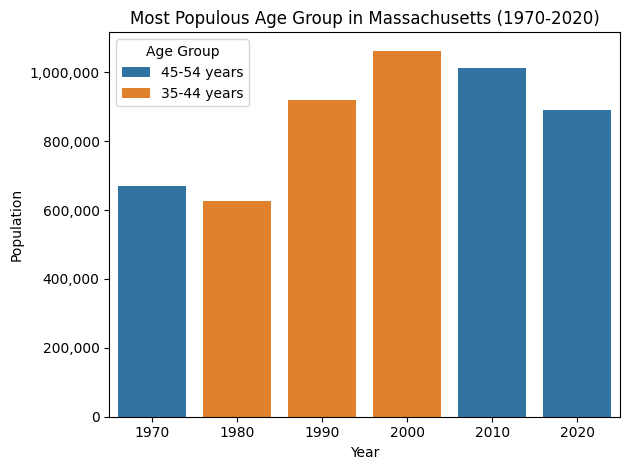

In [18]:
years = ['1970','1980','1990','2000','2010','2020']
mode_age_by_decade = {}

states = demographics.groupby('STATE').sum(numeric_only=True)

mass = states.loc['Massachusetts']

for year in years:
    age_groups = [col for col in demographics.columns if col.startswith('pop_') and col.endswith(year)]

    mode_age_group = mass[age_groups].idxmax()
    age_pop = mass[mode_age_group]

    formatted_mode_age_group = format_age_group(mode_age_group)

    mode_age_by_decade[year] = (formatted_mode_age_group, int(age_pop))

mode_df = pd.DataFrame({
    'year': list(mode_age_by_decade.keys()),
    'age_group': [v[0] for v in mode_age_by_decade.values()],
    'population': [v[1] for v in mode_age_by_decade.values()]
})

# Convert year to int for better plotting
mode_df['year'] = mode_df['year'].astype(int)

sns.barplot(mode_df, x='year', y='population', hue='age_group')
plt.title('Most Populous Age Group in Massachusetts (1970-2020)')
plt.ylabel('Population')
plt.xlabel('Year')

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [19]:
for col in demographics.columns:
    print(col)

GISJOIN
STATE
STATEFP
STATENH
COUNTY
COUNTYFP
COUNTYNH
total_pop_1970
total_pop_1980
total_pop_1990
total_pop_2000
total_pop_2010
total_pop_2020
male_pop_1970
male_pop_1980
male_pop_1990
male_pop_2000
male_pop_2010
male_pop_2020
female_pop_1970
female_pop_1980
female_pop_1990
female_pop_2000
female_pop_2010
female_pop_2020
pop_under_5_years_1970
pop_under_5_years_1980
pop_under_5_years_1990
pop_under_5_years_2000
pop_under_5_years_2010
pop_under_5_years_2020
pop_5_9_years_1970
pop_5_9_years_1980
pop_5_9_years_1990
pop_5_9_years_2000
pop_5_9_years_2010
pop_5_9_years_2020
pop_10_14_years_1970
pop_10_14_years_1980
pop_10_14_years_1990
pop_10_14_years_2000
pop_10_14_years_2010
pop_10_14_years_2020
pop_15_17_years_1970
pop_15_17_years_1980
pop_15_17_years_1990
pop_15_17_years_2000
pop_15_17_years_2010
pop_15_17_years_2020
pop_18_19_years_1970
pop_18_19_years_1980
pop_18_19_years_1990
pop_18_19_years_2000
pop_18_19_years_2010
pop_18_19_years_2020
pop_20_years_1970
pop_20_years_1980
pop_20_ye

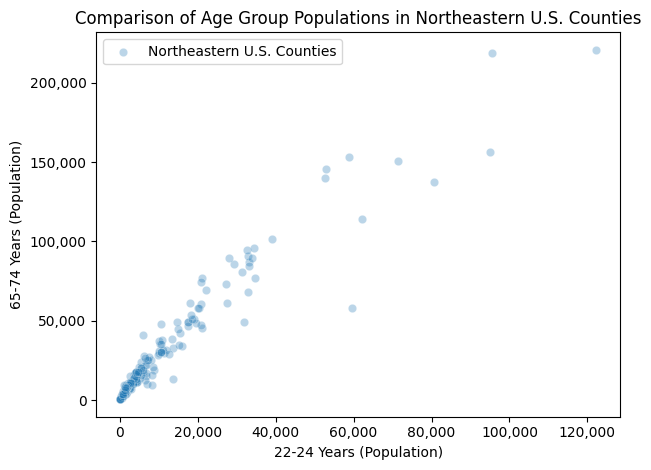

Correlation: 0.9594


In [20]:
# Let's create a scatterplot of the northeastern U.S. counties and compare two age groups together to see their relationship

northeast_states = {
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'
}

region = demographics[demographics['STATE'].isin(northeast_states)]

sns.scatterplot(data=region, x='pop_22_24_years_2020', y='pop_65_74_years_2020', alpha=0.3, label='Northeastern U.S. Counties')
plt.xlabel('22-24 Years (Population)')
plt.ylabel('65-74 Years (Population)')
plt.title('Comparison of Age Group Populations in Northeastern U.S. Counties')

# Format x and y axis with commas
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()

print(f"Correlation: {region['pop_22_24_years_2020'].corr(region['pop_65_74_years_2020']):.04f}")

There is a strong positive correlation with the populations of 22-24 year olds and 65-74 year olds. There are some outliers in this graph that shows counties with significantly higher populations or some that do not follow the general linear trend of the majority of the counties.

Below is the same graph, just with the outliers in red.

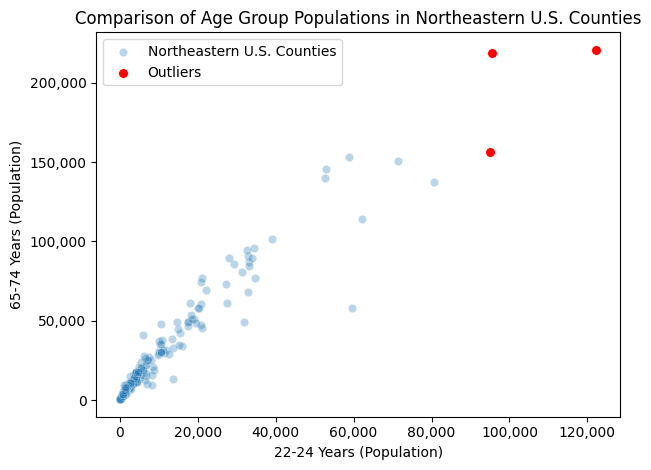

In [21]:
# main scatter plot
sns.scatterplot(data=region, x='pop_22_24_years_2020', y='pop_65_74_years_2020', alpha=0.3, label='Northeastern U.S. Counties')

# highlight the outliers over top
outliers = region[region['pop_65_74_years_2020'] > 150_000]
outliers = outliers[outliers['pop_22_24_years_2020'] > 90_000]
sns.scatterplot(data=outliers, x='pop_22_24_years_2020', y='pop_65_74_years_2020', color='red', label='Outliers', s=50)


plt.xlabel('22-24 Years (Population)')
plt.ylabel('65-74 Years (Population)')
plt.title('Comparison of Age Group Populations in Northeastern U.S. Counties')

# Format x and y axis with commas
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()


Without using more specific statistical methods, this graph shows what I think are rough estimates of outlier counties. The two counties with over 200,000 people age 65-74 and roughly 100,000 22-24 year olds are outliers because of the significantly large total populations of these two groups. The lower outlier, roughly (90,000 , 150,000) is an outlier because it deviates from the mostly linear relation too much. If I were to do a linear regression model with this data, the error of this point is quite significant compared to most of the other counties.

### Conclusions:

While the life expectancy data is usable, I'd rather find a better life expectancy dataset that offers the information for all races rather than just having 3 categories: All races, Black, White. Having more granularity will be important because I am trying to discover health disparities for life expectancy and cancer rates based on race, income, region, etc. As for the demographics census data, it is definitely useable. I am able to get quite granular if I want or I can group the data by state to find more macro levels. If I wanted, I can even find the national levels for each feature as well. The only thing is that I wish this dataset had more features. The data is based on sex and age, but I wish it also had more demographic features such as race. However, I can easily combine this data with a county level census data for race as well so I am not concerned.

There are definitely outliers since some counties are larger than others. For example, in my Northeastern U.S. Counties graph you can see how most of the data is clustered together but there are outliers who have much larger populations so it will obviously have larger age groups than the smaller counties.


In the beginning, I attempted to get a macro view of all counties plotted in a histogram based on their population for a given decade. However, I quickly noticed that it was difficult to see the true distribution. I will need to keep in mind that I might have to do some normalization or adjust bin size in order to better see the distribution shape of county populations in the entire country. That is something I will take away from this homework and continue on my capstone. Sometimes the range of features vary so much that it makes visualization a little tricky. For those kinds of features, it might be more useful to normalize it by taking the log or converting the values into decimal form (e.g., 1.5 instead of 1,500,000).

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

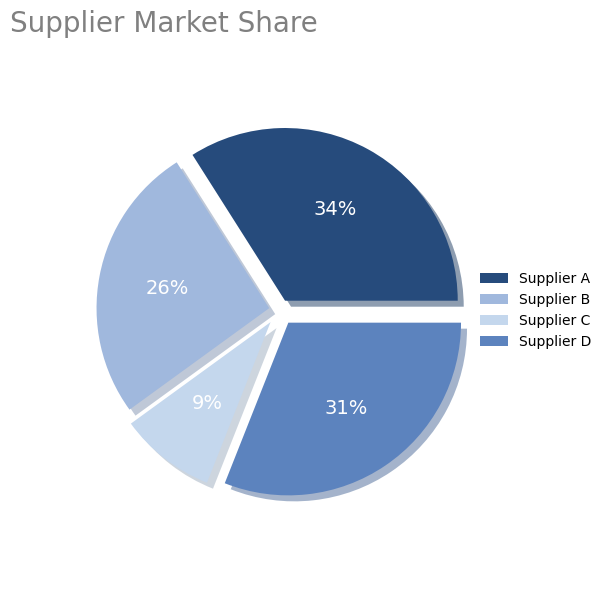

In [22]:
labels = 'Supplier A', 'Supplier B', 'Supplier C', 'Supplier D'
sizes = [34, 26, 9, 31]
colors = ['#264b7c', '#a0b8dd', '#c4d7ed', '#5c83be']
explode = [0.05, 0.05, 0.07, 0.07]

fig, ax = plt.subplots(figsize=(10, 6))
pathes, text, autotexts  = ax.pie(sizes, radius=0.8, autopct='%1.0f%%', explode=explode, shadow={'ox':0.02, 'edgecolor': 'none', 'shade': 0.2}, colors=colors)

for autotext in autotexts:
    autotext.set(**{'color': 'white', 'fontsize': 14})

plt.legend(pathes, labels, loc='center right', bbox_to_anchor=(1.1, 0.5), frameon=False)
plt.title('Supplier Market Share', fontsize=20, color='grey', loc='left')
plt.tight_layout()
plt.show()